In [30]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the datetime module from the datetime library.
from datetime import datetime

In [31]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [32]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [33]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [34]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [35]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | guanica
Processing Record 2 of Set 1 | norman wells
Processing Record 3 of Set 1 | luderitz
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | sorvag
City not found. Skipping...
Processing Record 6 of Set 1 | alofi
Processing Record 7 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 1 | dunedin
Processing Record 9 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | guider
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | agadez
Processing Record 16 of Set 1 | phonhong
Processing Record 17 of Set 1 | shenjiamen
Processing Record 18 of Set 1 | korla
Processing Record 19 of Set 1 | metsavan
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | clarence town
Processin

City not found. Skipping...
Processing Record 39 of Set 4 | ancud
Processing Record 40 of Set 4 | xichang
Processing Record 41 of Set 4 | ambilobe
Processing Record 42 of Set 4 | kingaroy
Processing Record 43 of Set 4 | oistins
Processing Record 44 of Set 4 | groningen
Processing Record 45 of Set 4 | mananara
Processing Record 46 of Set 4 | boyuibe
Processing Record 47 of Set 4 | muana
Processing Record 48 of Set 4 | praia da vitoria
Processing Record 49 of Set 4 | kjollefjord
Processing Record 50 of Set 4 | clyde river
Processing Record 1 of Set 5 | road town
Processing Record 2 of Set 5 | te anau
Processing Record 3 of Set 5 | touros
Processing Record 4 of Set 5 | airai
Processing Record 5 of Set 5 | davenda
Processing Record 6 of Set 5 | chagda
City not found. Skipping...
Processing Record 7 of Set 5 | fortuna
Processing Record 8 of Set 5 | camopi
Processing Record 9 of Set 5 | snasa
Processing Record 10 of Set 5 | sitka
Processing Record 11 of Set 5 | jibuti
Processing Record 12 of

Processing Record 30 of Set 8 | lolua
City not found. Skipping...
Processing Record 31 of Set 8 | poya
Processing Record 32 of Set 8 | cidreira
Processing Record 33 of Set 8 | yulara
Processing Record 34 of Set 8 | tandil
Processing Record 35 of Set 8 | dolinsk
Processing Record 36 of Set 8 | san jose
Processing Record 37 of Set 8 | lufilufi
Processing Record 38 of Set 8 | corinto
Processing Record 39 of Set 8 | rosarito
Processing Record 40 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 41 of Set 8 | fallon
Processing Record 42 of Set 8 | marsh harbour
Processing Record 43 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 44 of Set 8 | fort morgan
Processing Record 45 of Set 8 | springdale
Processing Record 46 of Set 8 | bafra
Processing Record 47 of Set 8 | ilulissat
Processing Record 48 of Set 8 | zolotinka
City not found. Skipping...
Processing Record 49 of Set 8 | isiolo
Processing Record 50 of Set 8 | lakhimpur
Processing Record

Processing Record 17 of Set 12 | tehri
Processing Record 18 of Set 12 | oga
Processing Record 19 of Set 12 | vardo
Processing Record 20 of Set 12 | fuzhou
Processing Record 21 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 22 of Set 12 | tafresh
Processing Record 23 of Set 12 | kudahuvadhoo
Processing Record 24 of Set 12 | levokumskoye
Processing Record 25 of Set 12 | gombong
Processing Record 26 of Set 12 | sorong
Processing Record 27 of Set 12 | terney
Processing Record 28 of Set 12 | praya
Processing Record 29 of Set 12 | port-gentil
Processing Record 30 of Set 12 | ucluelet
Processing Record 31 of Set 12 | dangriga
Processing Record 32 of Set 12 | kitimat
Processing Record 33 of Set 12 | chicama
Processing Record 34 of Set 12 | sayyan
Processing Record 35 of Set 12 | puerto madryn
Processing Record 36 of Set 12 | olafsvik
Processing Record 37 of Set 12 | mago
Processing Record 38 of Set 12 | mpika
Processing Record 39 of Set 12 | bellevue
Processing Record 40 o

In [36]:
len(cities)

595

In [37]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Guanica,17.97,-66.91,79.00,80,75,12.75,PR,2020-02-20 00:29:07
1,Norman Wells,65.28,-126.83,10.40,72,75,2.24,CA,2020-02-20 00:29:07
2,Luderitz,-26.65,15.16,63.95,95,64,12.53,NA,2020-02-20 00:29:07
3,Atuona,-9.80,-139.03,82.08,77,94,17.38,PF,2020-02-20 00:29:07
4,Alofi,-19.06,-169.92,86.00,62,75,16.11,NU,2020-02-20 00:29:07
5,Dunedin,-45.87,170.50,62.01,82,82,1.01,NZ,2020-02-20 00:29:01
6,Mataura,-46.19,168.86,67.57,62,100,5.46,NZ,2020-02-20 00:29:07
7,Guider,9.93,13.95,72.66,19,18,10.09,CM,2020-02-20 00:29:08
8,Ushuaia,-54.80,-68.30,48.20,81,75,24.16,AR,2020-02-20 00:29:08
9,Hilo,19.73,-155.09,78.01,69,75,4.70,US,2020-02-20 00:29:08


In [38]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Guanica,PR,2020-02-20 00:29:07,17.97,-66.91,79.00,80,75,12.75
1,Norman Wells,CA,2020-02-20 00:29:07,65.28,-126.83,10.40,72,75,2.24
2,Luderitz,NA,2020-02-20 00:29:07,-26.65,15.16,63.95,95,64,12.53
3,Atuona,PF,2020-02-20 00:29:07,-9.80,-139.03,82.08,77,94,17.38
4,Alofi,NU,2020-02-20 00:29:07,-19.06,-169.92,86.00,62,75,16.11


In [39]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [40]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

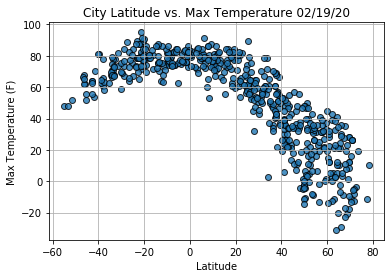

In [42]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

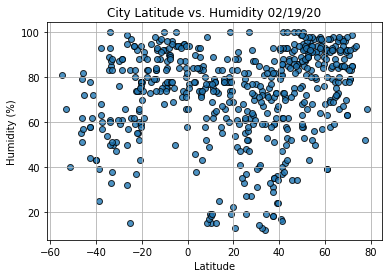

In [43]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

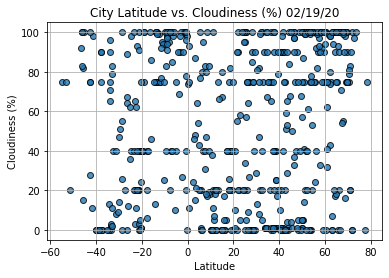

In [44]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

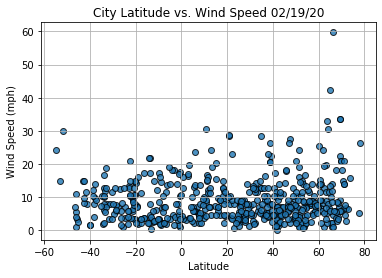

In [45]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()